This is a demonstration of how a self-organizing map (SOM), also known as a Kohonen network, can be used to map high-dimensional data into a two-dimensional representation.

# Prepare data

The matrix signifies that the respective animal has a certain characteristic.

In [3]:
import pandas as pd

In [4]:
lsCategory = ['鴿子', '母雞', '鴨', '鵝', '貓頭鷹', '隼', '鷹', '狐狸', '狗', '狼', '貓', '虎', '獅', '馬', '斑馬', '牛']
lsFeatures = [
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0],
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

dfData = pd.DataFrame(lsFeatures, columns=lsCategory).T
# dfData['cate'] = dfData.index
arrData = dfData.values
dfData


0  1  2  3  4  5  6  7  8  9  10  11  12
鴿子   1  0  0  1  0  0  1  0  1  0   0   1   0
母雞   1  0  0  1  0  0  1  0  1  0   0   0   0
鴨    1  0  0  1  0  0  1  0  1  0   0   0   1
鵝    1  0  0  1  0  0  1  0  1  0   0   1   1
貓頭鷹  1  0  0  1  0  0  1  0  1  1   0   1   0
隼    0  0  0  1  0  0  1  0  1  1   0   1   0
鷹    0  1  0  1  0  0  1  0  1  1   0   1   0
狐狸   0  1  0  0  1  1  0  0  0  1   0   0   0
狗    0  1  0  0  1  1  0  0  0  0   1   0   0
狼    0  1  0  0  1  1  0  0  0  1   1   0   0
貓    1  0  0  0  1  1  0  0  0  1   0   0   0
虎    0  0  1  0  1  1  0  0  0  1   1   0   0
獅    0  0  1  0  1  1  0  0  0  1   1   0   0
馬    0  0  1  0  1  1  0  1  0  0   1   0   0
斑馬   0  0  1  0  1  1  0  1  0  0   1   0   0
牛    0  0  1  0  1  1  0  0  0  0   0   0   0

# Import SOM package

The source of model is included in the site (http://www.pymvpa.org/index.html) 

There are a few Python distributions for Windows. You could ease deploying a PyMVPA installation on Windows significantly.(https://www.lfd.uci.edu/~gohlke/pythonlibs/)

In [8]:
from mvpa2.suite import SimpleSOMMapper

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Independent variable: Learning Rate

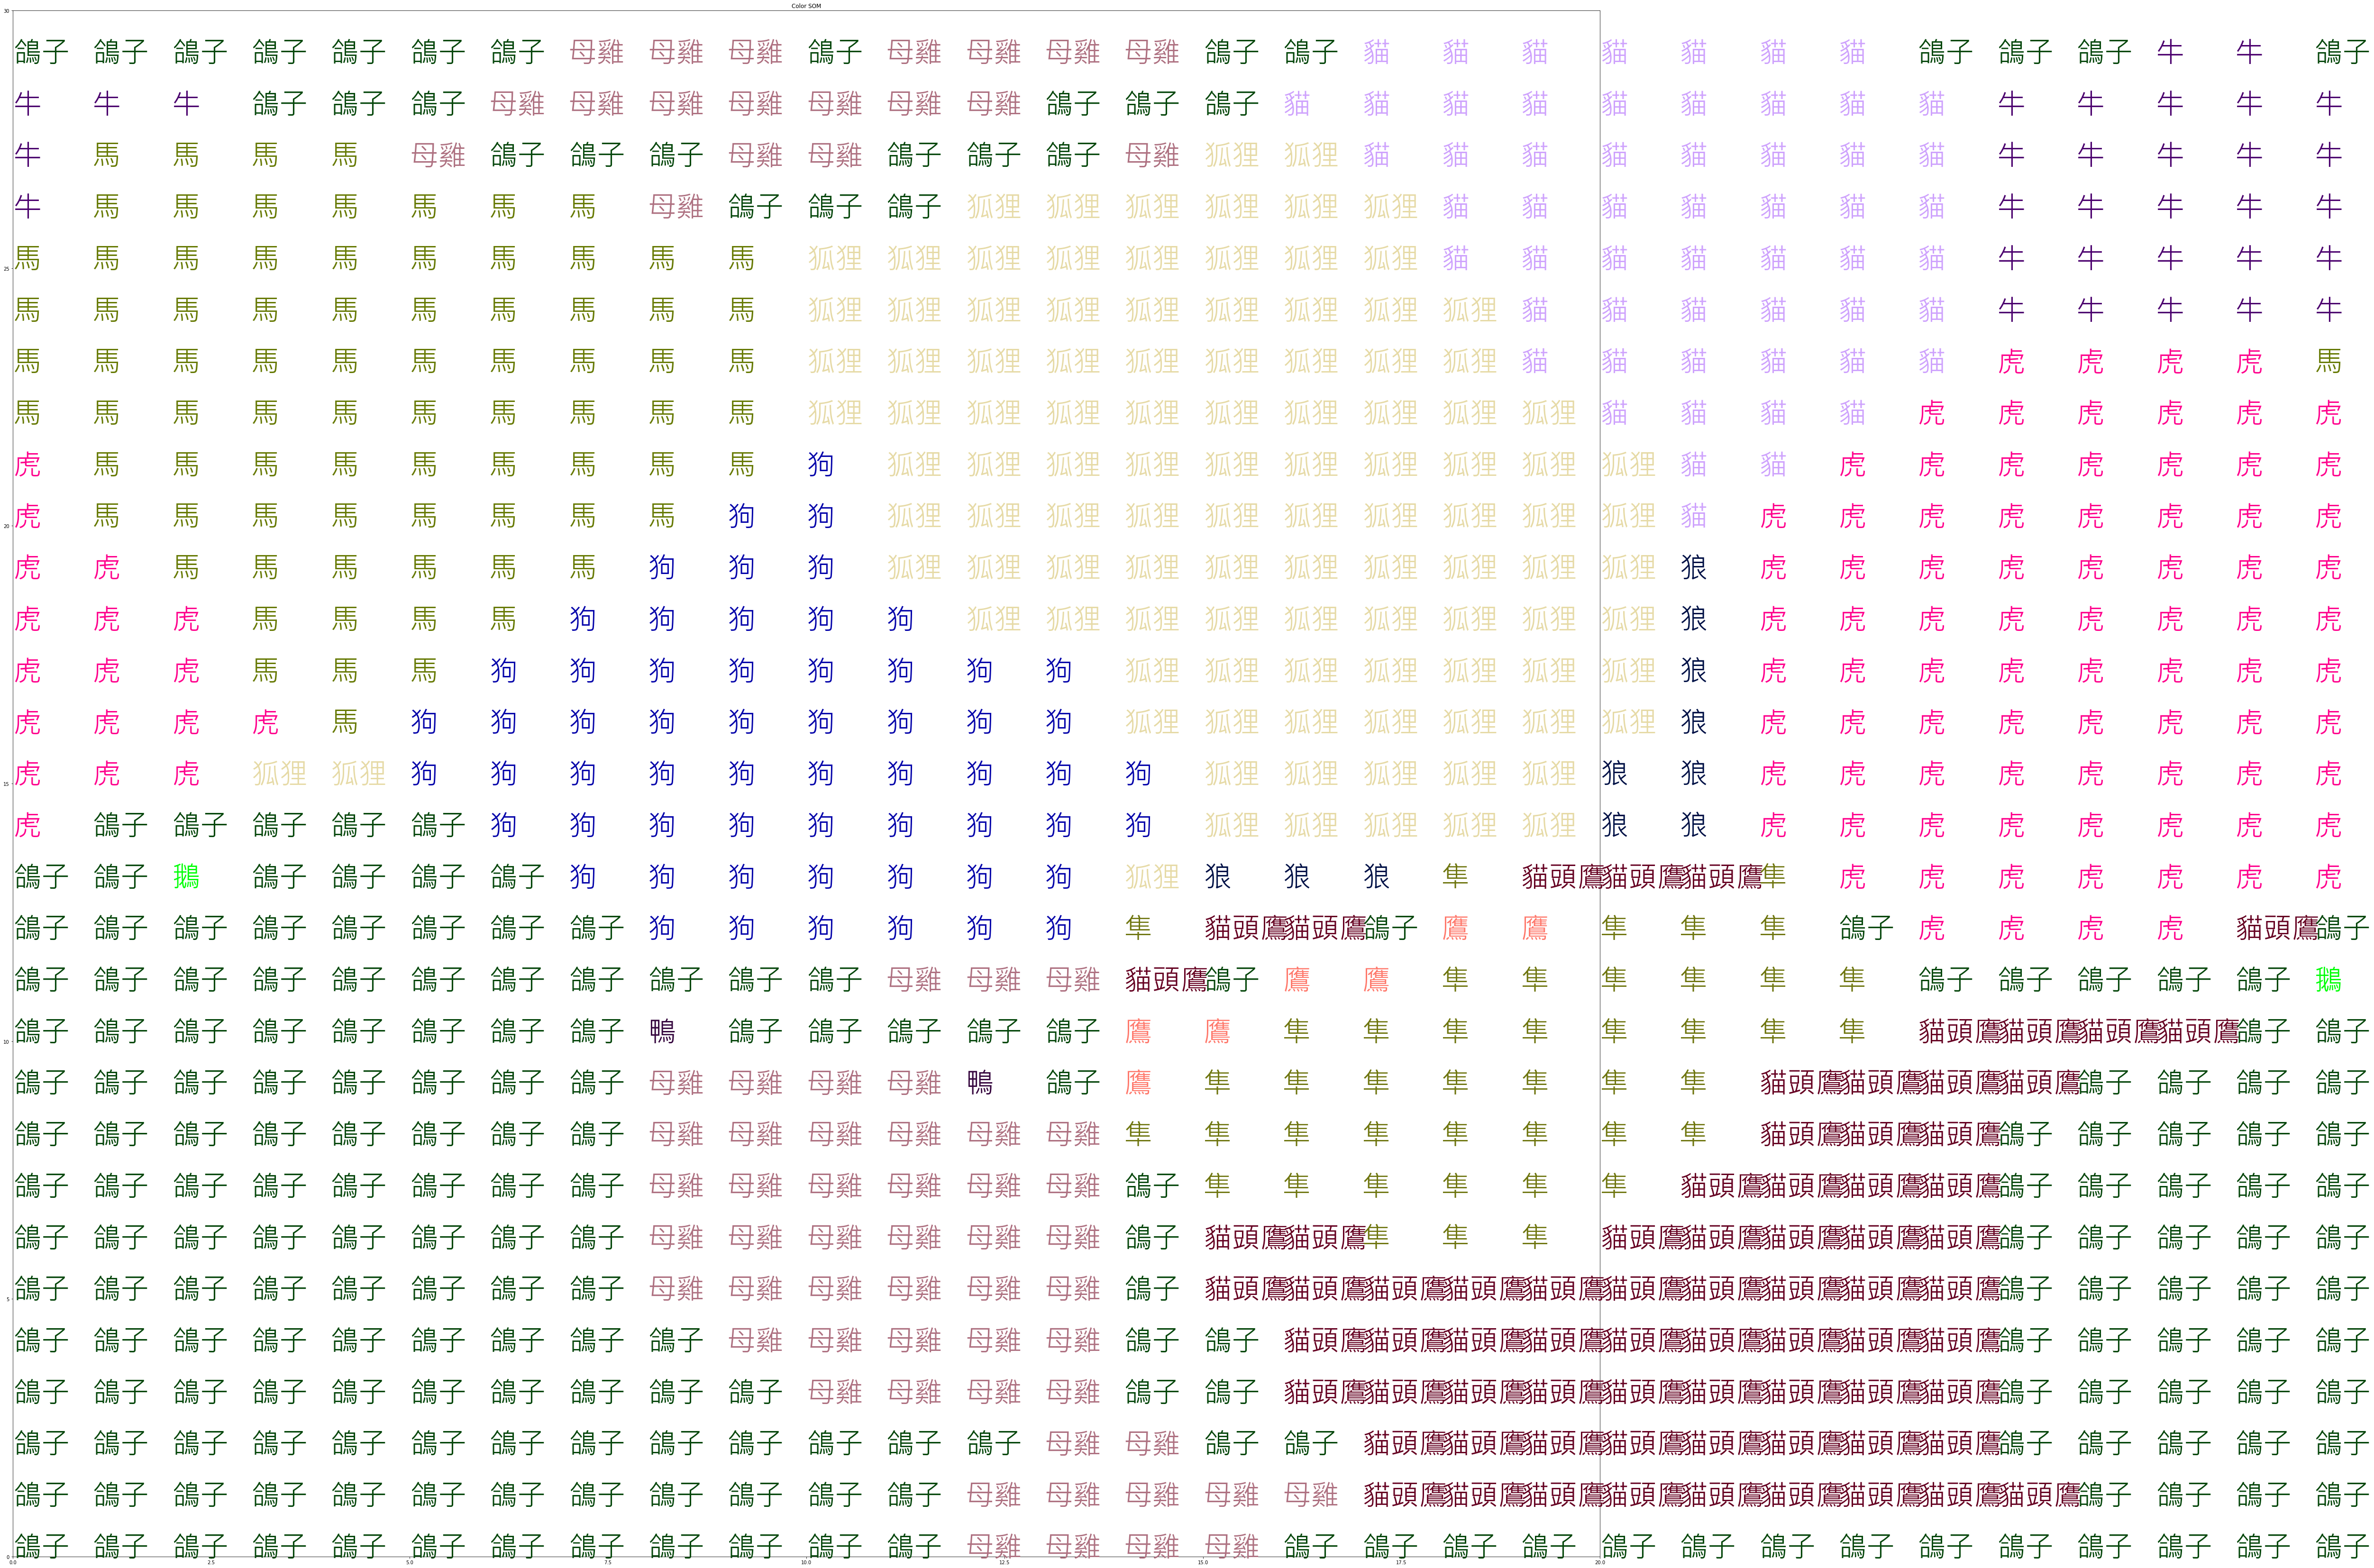

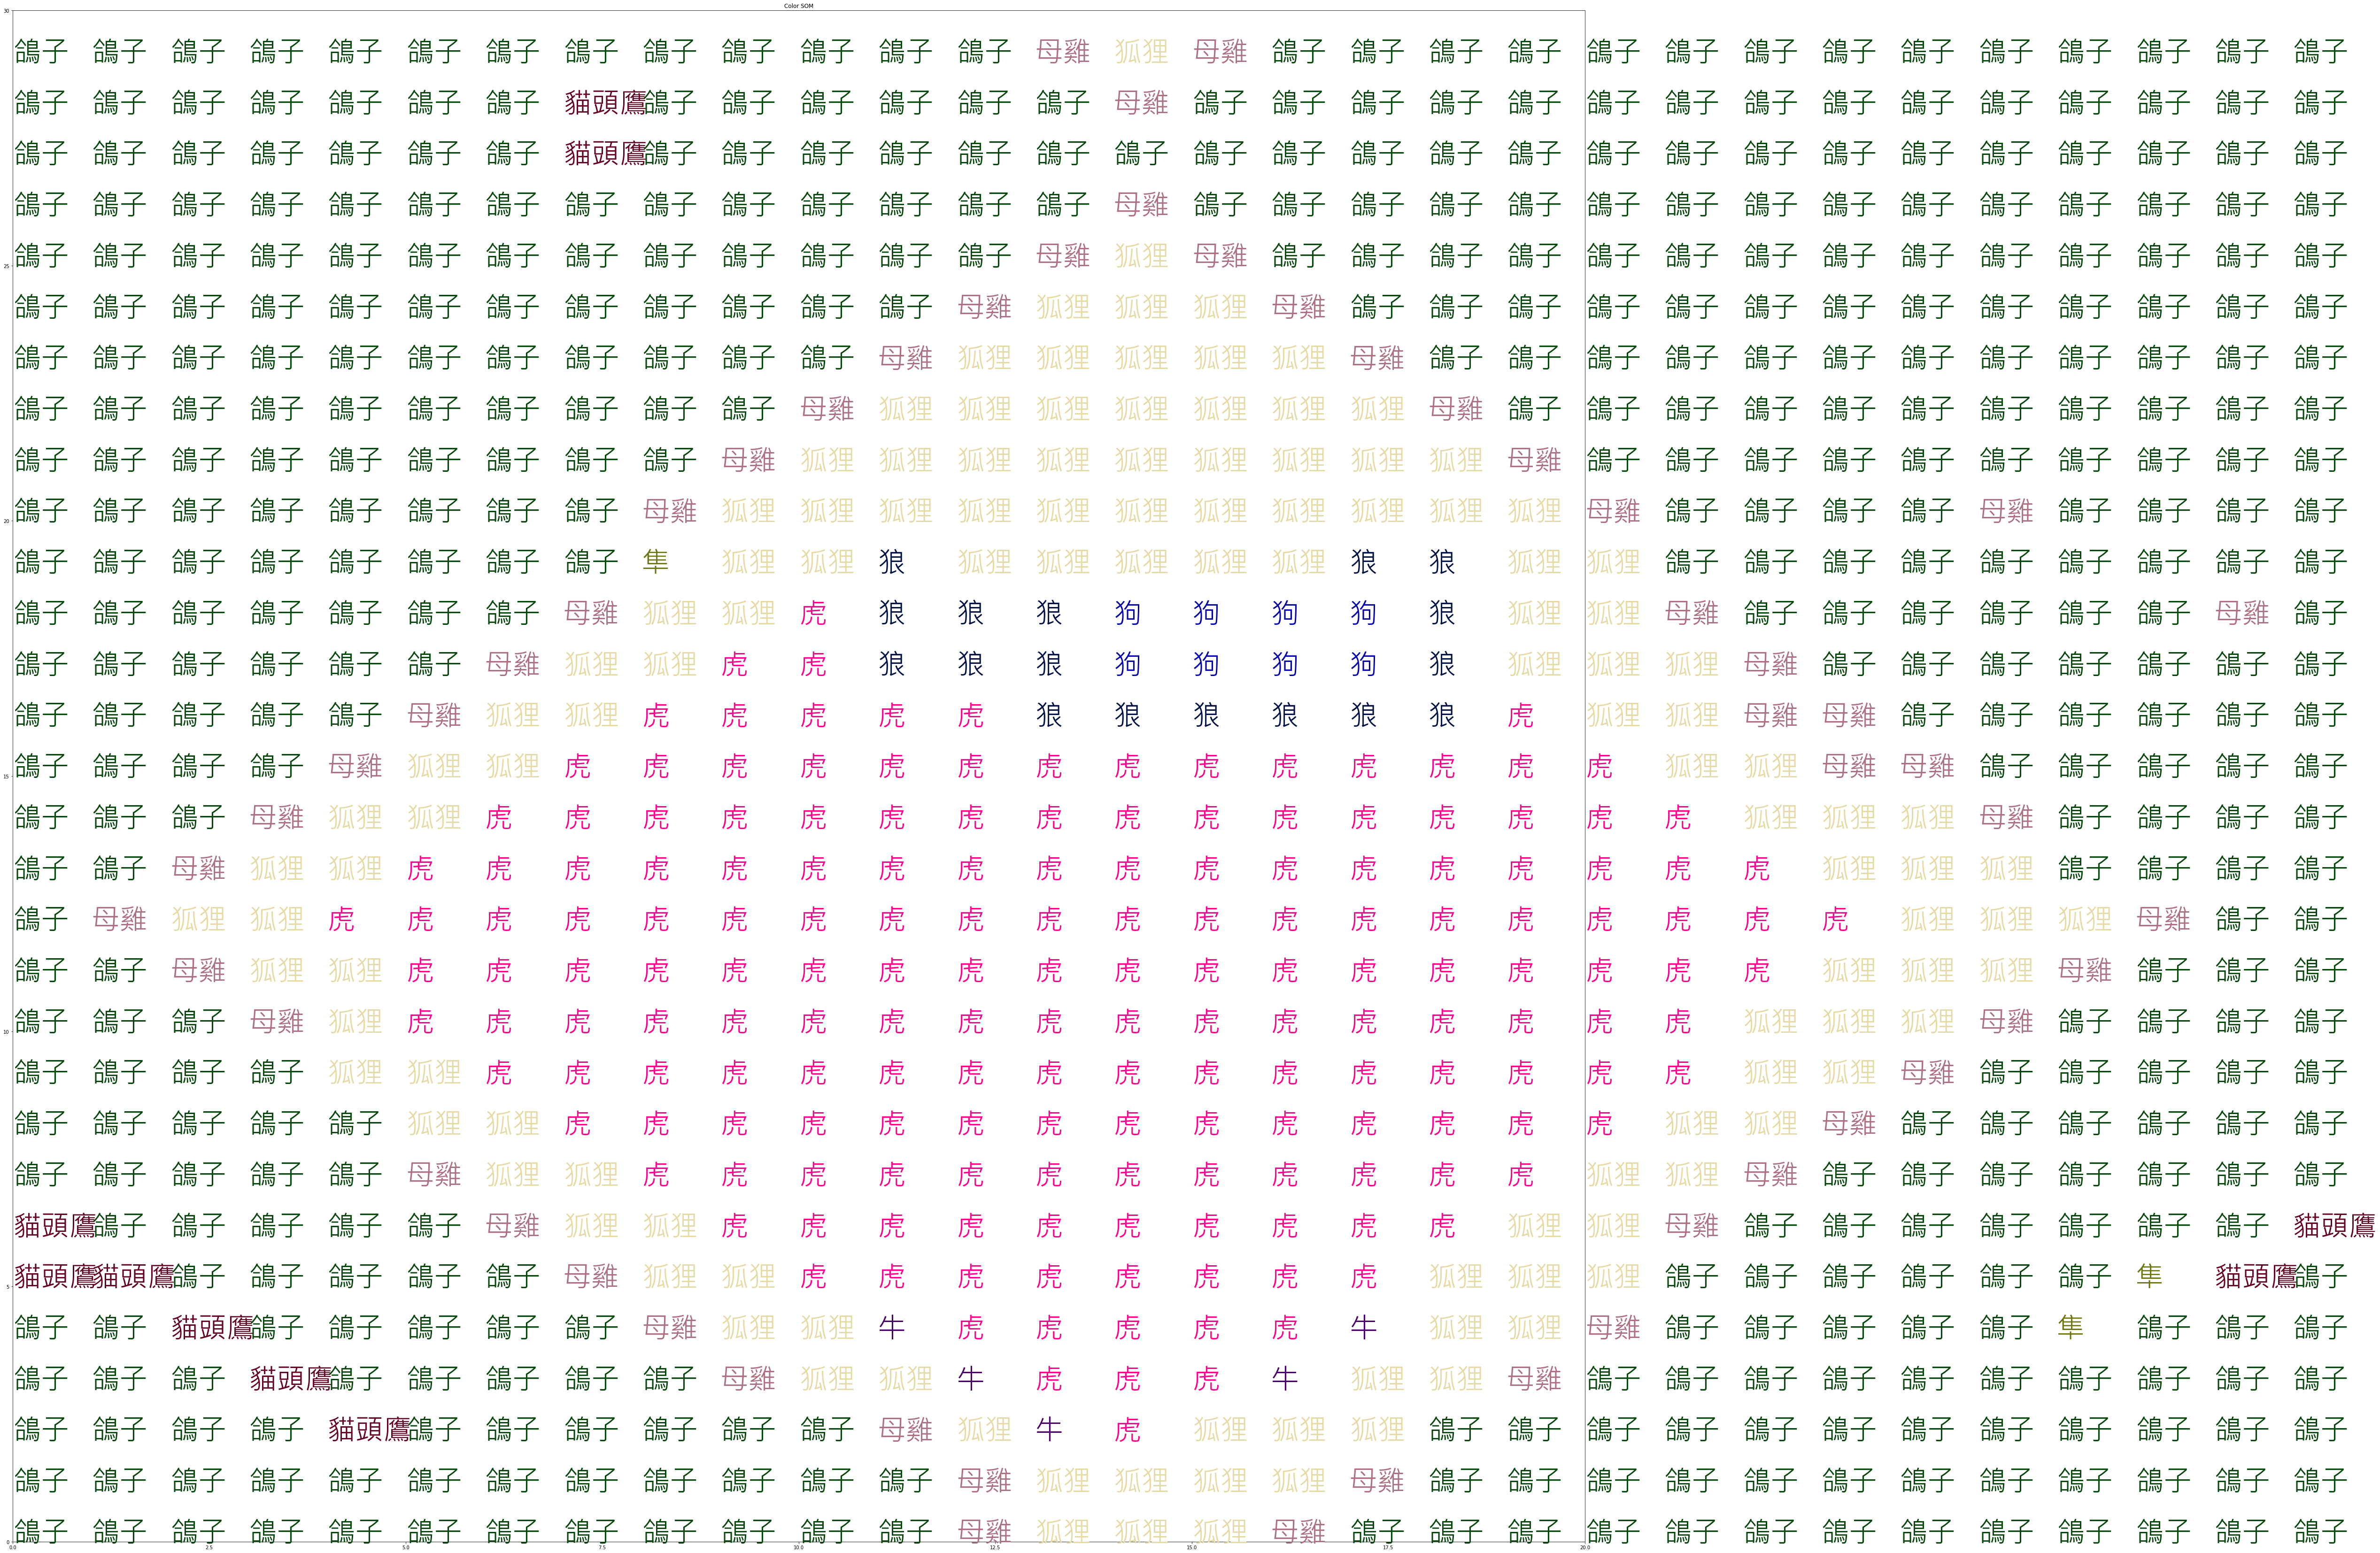

In [13]:
learningRate = [0.01, 0.001]
arrData = dfData.values

ls_color = ['#06470c','#ae7181', '#35063e', '#01ff07', '#650021', '#6e750e', '#ff796c', '#e6daa6', '#0504aa', '#001146', '#cea2fd', '#ff028d', '#ad8150', '#677a04', '#840000', '#4b006e']
myfont = FontProperties(fname=r'C:\Windows\WinSxS\amd64_microsoft-windows-f..e-microsoftjhenghei_31bf3856ad364e35_10.0.18362.1_none_379e287e5d4d6113\msjh.ttc', size=60)

for i in learningRate:
    som = SimpleSOMMapper((30, 30), 2000, learning_rate=i)
    som.train(arrData)
    
    fig = plt.figure( figsize=(60, 60))
    ax = fig.add_subplot(111)

    x = []
    y = []
    group = []
    import numpy as np
    for i in range(som.K.shape[0]):
        for j in range(som.K.shape[1]):
            buffer = np.array([0 for i in range(16)])
            for k in range(16):
                buffer[k] = np.linalg.norm(arrData[k] - som.K[i][j])
            index = np.argmin(buffer)
            group.append(lsCategory[index])
            x.append(i)
            y.append(j)
            ax.text(i, j, lsCategory[index], fontsize=40,fontproperties = myfont, color=ls_color[index])


    ax.axis([0, 20, 0, 30])
    plt.title('Color SOM')
    plt.show()

# Independent variable: iterate number

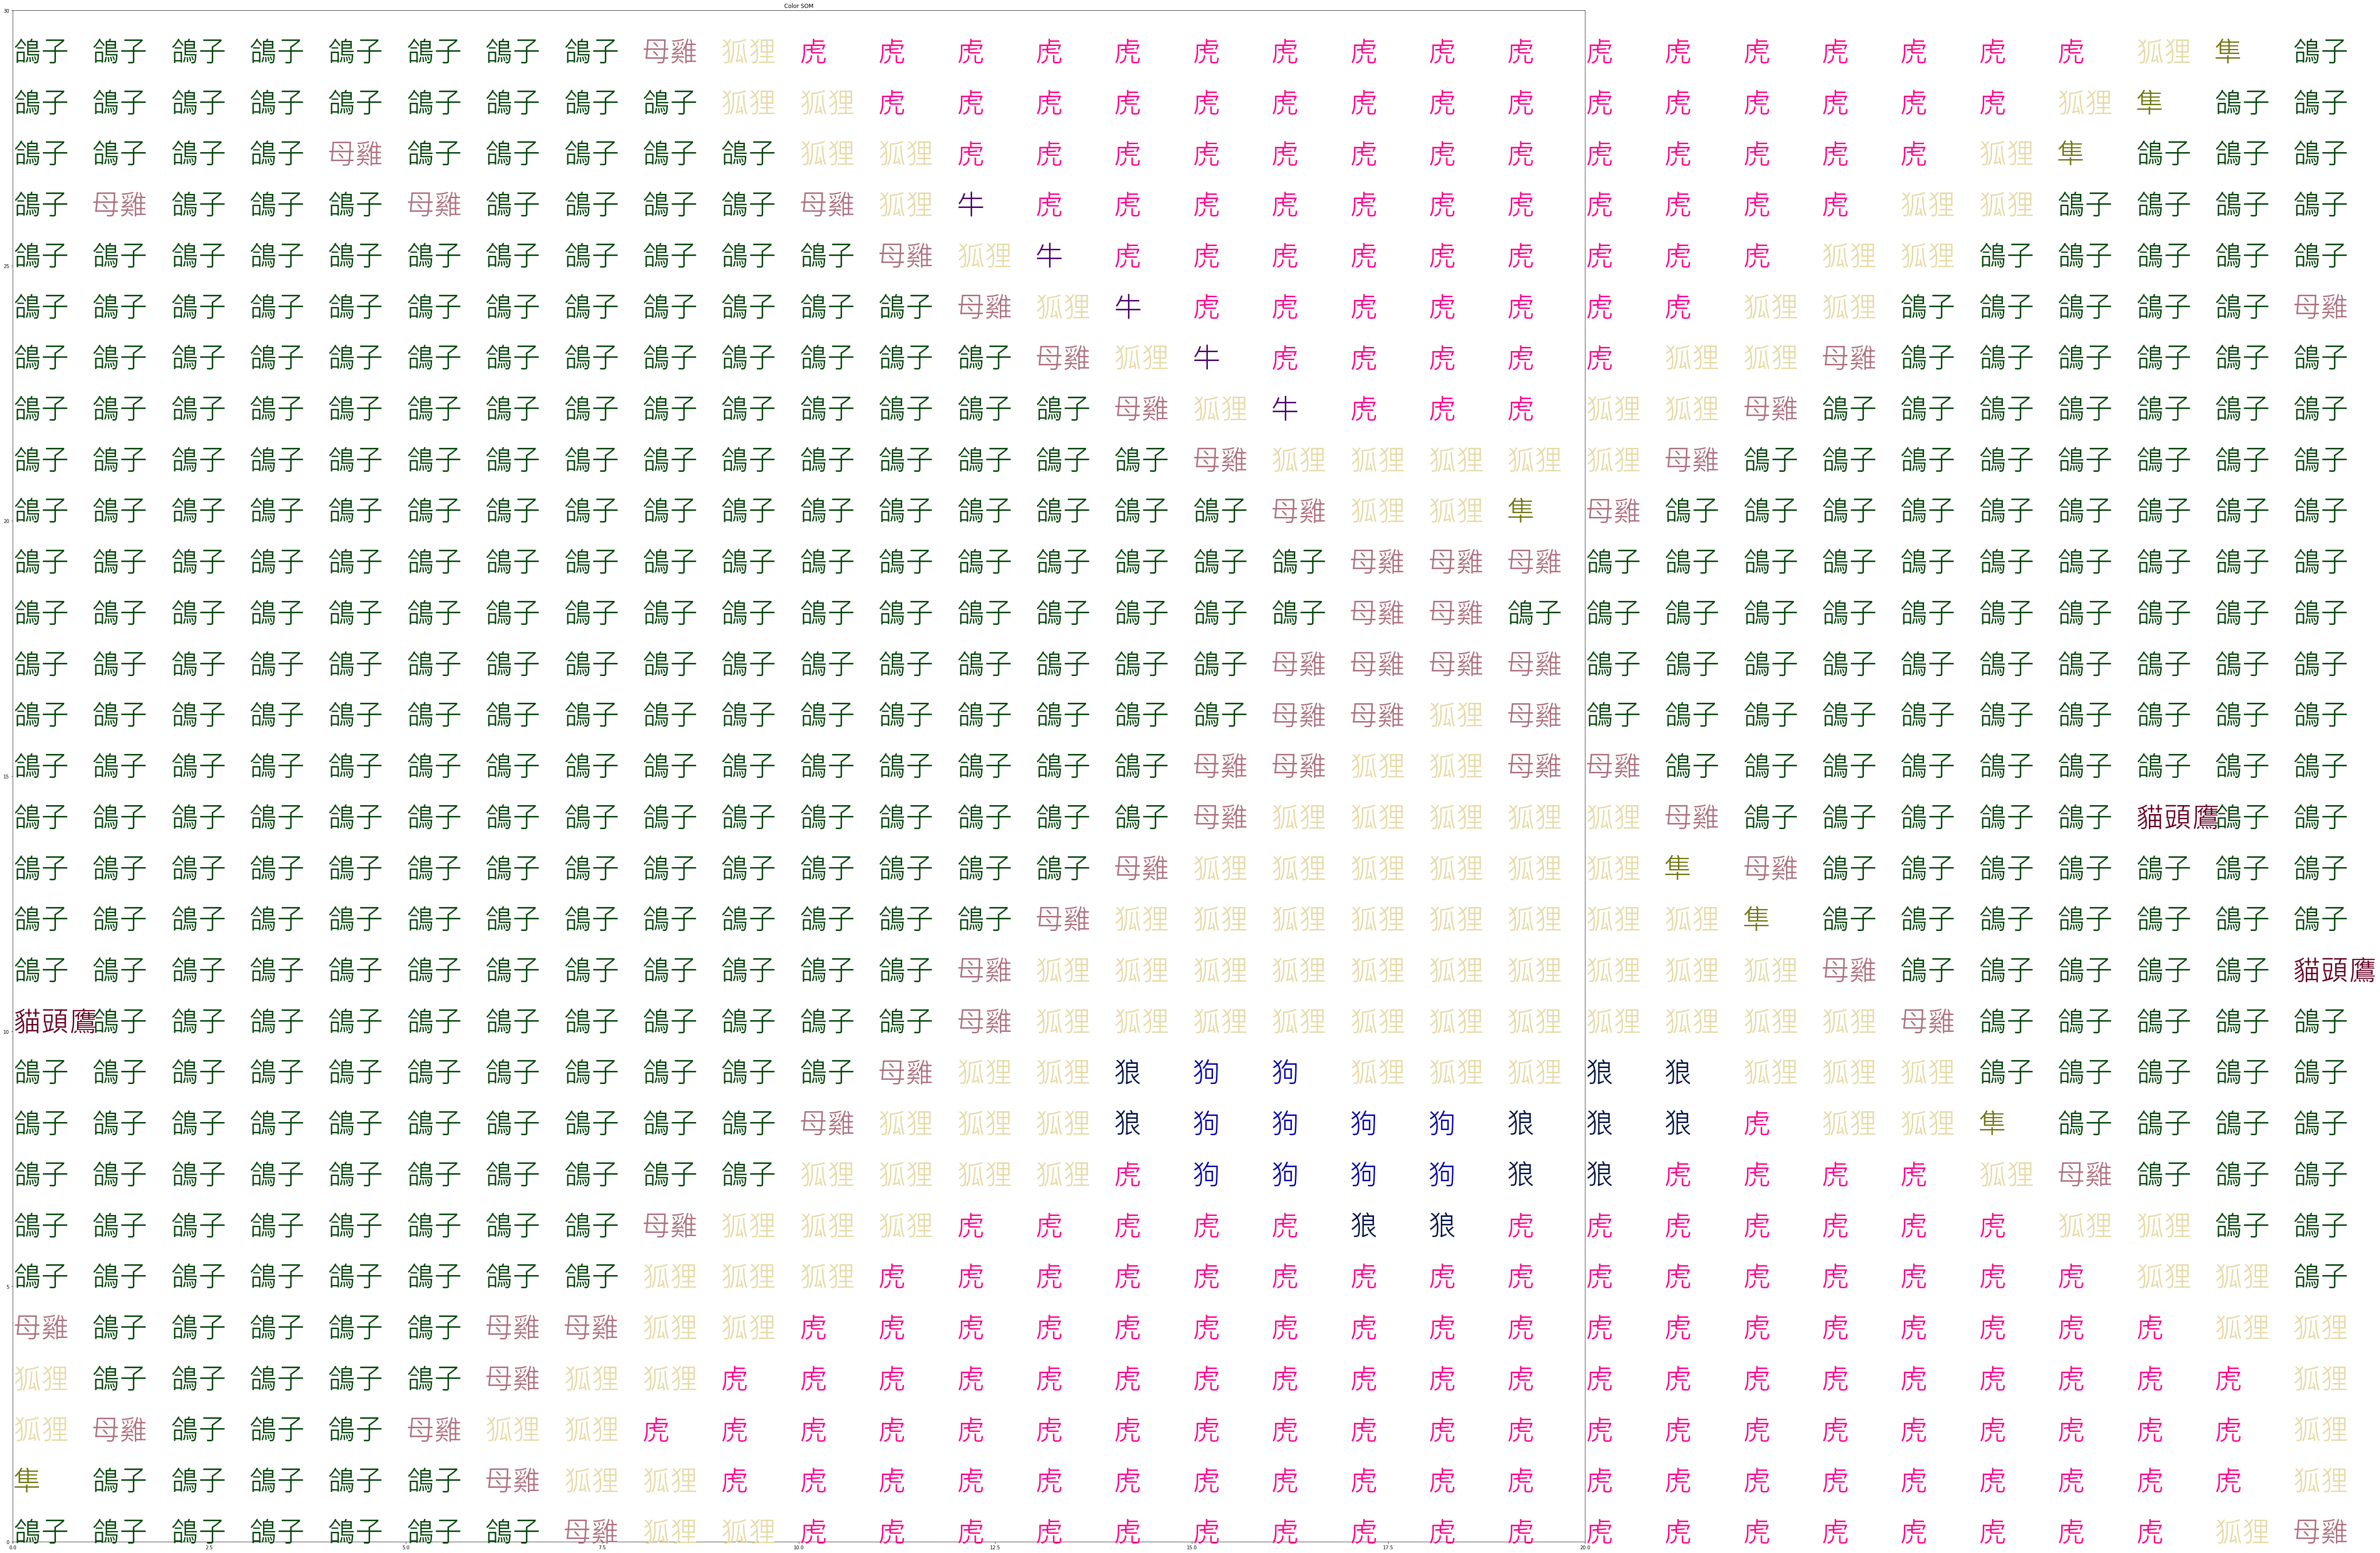

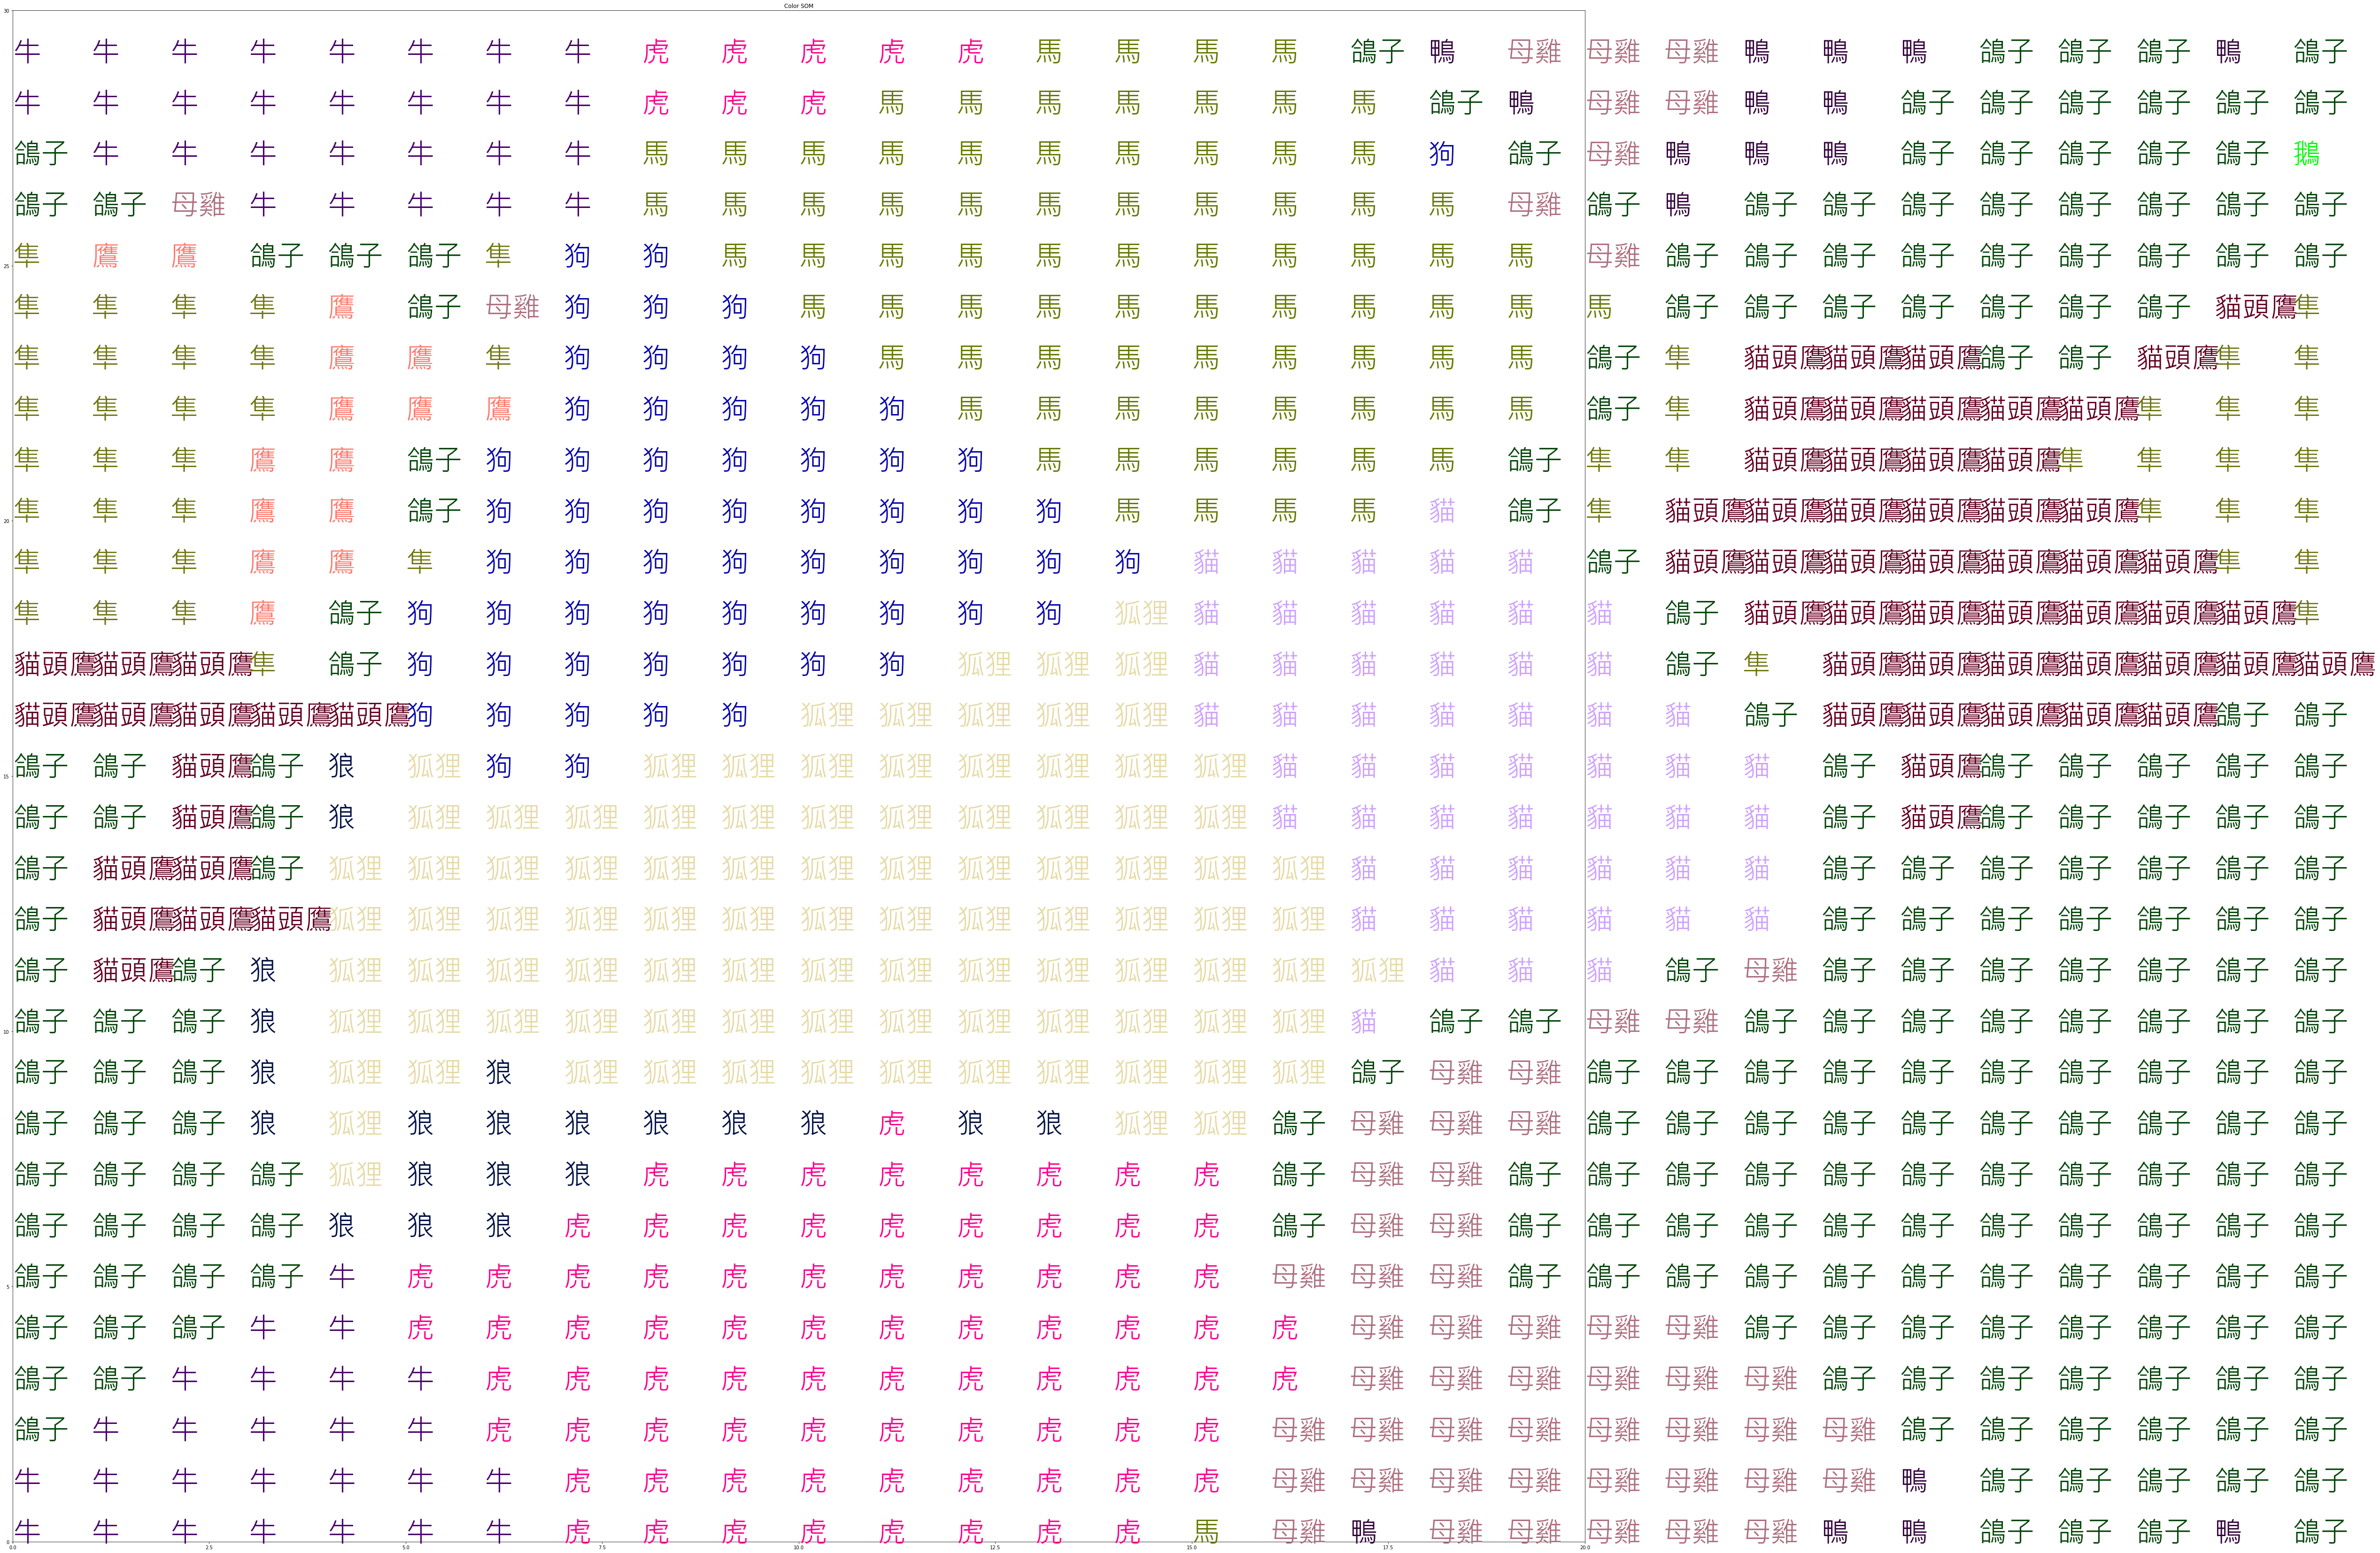

In [18]:
learningRate = [0.02]
iterate = [100, 2000]
arrData = dfData.values

ls_color = ['#06470c','#ae7181', '#35063e', '#01ff07', '#650021', '#6e750e', '#ff796c', '#e6daa6', '#0504aa', '#001146', '#cea2fd', '#ff028d', '#ad8150', '#677a04', '#840000', '#4b006e']
myfont = FontProperties(fname=r'C:\Windows\WinSxS\amd64_microsoft-windows-f..e-microsoftjhenghei_31bf3856ad364e35_10.0.18362.1_none_379e287e5d4d6113\msjh.ttc', size=60)

for i in iterate:
    som = SimpleSOMMapper((30, 30), i, learning_rate=0.02)
    som.train(arrData)
    
    fig = plt.figure( figsize=(60, 60))
    ax = fig.add_subplot(111)

    x = []
    y = []
    group = []
    import numpy as np
    for i in range(som.K.shape[0]):
        for j in range(som.K.shape[1]):
            buffer = np.array([0 for i in range(16)])
            for k in range(16):
                buffer[k] = np.linalg.norm(arrData[k] - som.K[i][j])
            index = np.argmin(buffer)
            group.append(lsCategory[index])
            x.append(i)
            y.append(j)
            ax.text(i, j, lsCategory[index], fontsize=40,fontproperties = myfont, color=ls_color[index])


    ax.axis([0, 20, 0, 30])
    plt.title('Color SOM')
    plt.show()

#  Learning Rate愈小(0.001)，拓樸會發散，不容易讓各群資料聚攏的特性
#  training 達足夠次數，就可以讓拓樸的資料有明顯的聚類